# Penguins Project


## Part 1

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import preprocessing, svm, tree
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
url = 'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
penguins = pd.read_csv(url)
penguins['Species'] = penguins['Species'].str.split().str.get(0)
penguins = penguins.drop(['Comments'], axis = 1)
penguins = penguins.dropna()
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
1,PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
4,PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
5,PAL0708,6,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805
6,PAL0708,7,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,11/15/07,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,PAL0910,119,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,No,12/1/09,47.2,13.7,214.0,4925.0,FEMALE,7.99184,-26.20538
340,PAL0910,121,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832
341,PAL0910,122,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117
342,PAL0910,123,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969


In [3]:
def penguin_summary(ask, value):
    """
    Creates a data summary of the specified columns of penguin
    that return the mean and standard deviation on the values
    specified in the function call
    """
    x = penguins.groupby(ask)[value].mean() 
# creates a summary based on means of the columns ask and value
    y = penguins.groupby(ask)[value].std()
# creates a summary based on standard deviations of the 
# columns ask and value
    return (x, y)

In [4]:
inspect = [
    ['Culmen Length (mm)', 'Culmen Depth (mm)'],
    ['Culmen Length (mm)', 'Delta 15 N (o/oo)'],
    ['Culmen Depth (mm)', 'Delta 15 N (o/oo)']
]
# the columns in inspect are the ones we obtain from
# extracting the desired columns of penguins in cells below

for i in inspect:
# loops through the different possible combinations
    print(penguin_summary(['Species', 'Sex'],i))
# gives the output

(                  Culmen Length (mm)  Culmen Depth (mm)
Species   Sex                                          
Adelie    FEMALE           37.212676          17.619718
          MALE             40.427941          19.057353
Chinstrap FEMALE           46.573529          17.588235
          MALE             51.069697          19.245455
Gentoo    .                44.500000          15.700000
          FEMALE           45.563793          14.237931
          MALE             49.510000          15.725000,                   Culmen Length (mm)  Culmen Depth (mm)
Species   Sex                                          
Adelie    FEMALE            2.003706           0.956126
          MALE              2.341568           1.019265
Chinstrap FEMALE            3.108669           0.781128
          MALE              1.582222           0.771804
Gentoo    .                      NaN                NaN
          FEMALE            2.051247           0.540249
          MALE              2.728674          

In [5]:
penguins.groupby(['Species', 'Sex']).aggregate([np.mean, np.std])

Sample Number            Culmen Length (mm)            \
                          mean        std               mean       std   
Species   Sex                                                            
Adelie    FEMALE     80.112676  42.698795          37.212676  2.003706   
          MALE       83.426471  41.723438          40.427941  2.341568   
Chinstrap FEMALE     34.294118  19.982613          46.573529  3.108669   
          MALE       33.909091  19.609251          51.069697  1.582222   
Gentoo    .         117.000000        NaN          44.500000       NaN   
          FEMALE     60.931034  35.796139          45.563793  2.051247   
          MALE       62.483333  35.734184          49.510000  2.728674   

                 Culmen Depth (mm)           Flipper Length (mm)            \
                              mean       std                mean       std   
Species   Sex                                                                
Adelie    FEMALE         17.619718  0.956126          187.915493  5.620743   
          MALE           19.057353  1.019265          192.838235  6.470623   
Chinstrap FEMALE         17.588235  0.781128          191.735294  5.754096   
          MALE           19.245455  0.771804          199.727273  5.970096   
Gentoo    .              15.700000       NaN          217.000000       NaN   
          FEMALE         14.237931  0.540249          212.706897  3.897856   
          MALE           15.725000  0.745296          221.533333  5.720811   

                 Body Mass (g)             Delta 15 N (o/oo)            \
                          mean         std              mean       std   
Species   Sex                                                            
Adelie    FEMALE   3366.549296  269.554648          8.793275  0.475914   
          MALE     4053.676471  339.810766          8.928437  0.362755   
Chinstrap FEMALE   3527.205882  285.333912          9.250962  0.322040   
          MALE     3938.636364  367.747095          9.464535  0.386763   
Gentoo    .        4875.000000         NaN          8.041110       NaN   
          FEMALE   4679.741379  281.578294          8.193405  0.279057   
          MALE     5488.750000  314.293160          8.303429  0.245151   

                 Delta 13 C (o/oo)            
                              mean       std  
Species   Sex                                 
Adelie    FEMALE        -25.794158  0.613175  
          MALE          -25.833813  0.562443  
Chinstrap FEMALE        -24.565405  0.241078  
          MALE          -24.550104  0.202691  
Gentoo    .             -26.184440       NaN  
          FEMALE        -26.197205  0.534377  
          MALE          -26.170608  0.554716

1. ***Adelie:*** shortest culmen length, pretty equal culmen depth to Chinstrap, and delta 15 is conflicting with Chinstrap and Gentoo due to larger standard deviation.
2. ***Chinstrap:*** Longest culmen length, also with the most spread in standard deviation on culmen length, culmen depth is the longest, but very similar to Adelie, Delta 15 is the largest.
3. ***Gentoo:*** Culmen Length is very similar to Chinstrap, all 3 in fact have quite large standard deviations on the culmen length such that it can lead to confusion in guessing the type. Culmen Depth is the shortest, quite significantly with a lower standard deviation, and it has the smallest delta 15 but all 3 are also quite similar in that category with low standard deviations.

## Preparing Data 1

*We'll drop the columns "Date Egg", "Stage", "studyName", and "Individual ID" for this task as these columns appear to not be effective, or rather challenging to work with.*

In [6]:
penguins = penguins.drop(['Date Egg', 'Stage', 'studyName', 'Individual ID'],
                         axis = 1)
# modifying penguins to stay with the desired columns

In [7]:
def prep_penguins(pingu1):
    """
    Prepares the data of penguins DataFrame for use
    in machine learning exercises by encoding the columns
    that are non-numeric to be numeric.
    
    """
    le = preprocessing.LabelEncoder()
    # for converting columns into numerical datatypes
    pingu = pingu1.copy()
    # creates a copy of the dataframe we passed
    
    for i in list(pingu):
    # loops through all column names
        kind = np.unique(pingu[i])
    # gets the column datatype by entering the first entry of a specific column
        if type(kind[0]) == str:
            if i == "Sex":
        # gets the index of wherever penguins['Sex'] is "."
                index = pingu[(pingu['Sex'] == ".")].index
                pingu.drop(index, inplace = True)
        # we encode Sex by 0 & 1
            pingu[i] = le.fit_transform(pingu[i])
        # control flow to drop nan values in culmen length/depth
        if (i == "Culmen Depth (mm)") | (i == "Culmen Length (mm)"):
            index = pingu[pingu[i] == "NaN"].index
            #finds index of nan values
            pingu.drop(index, inplace = True)
            #drop the nan values
    y = pingu['Species'].values
    # creates target data
    X = pingu.drop(['Species'], axis = 1).values
    # creates predictive data
    return(X, y)

In [8]:
np.random.seed(1234)
train, test = train_test_split(penguins, test_size = 0.2)
# splits the data into 80% of test data randomly selected
# test data is the remaining 20% for testing

In [9]:
x_train, y_train = prep_penguins(train)
# preps the training data with function above


In [10]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# define RFE for deciding the depth and number of features we want
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)
# fit RFE
rfe.fit(x_train, y_train)
# summarize all features
names = penguins.columns
# creates a list of the column names
for i in range(x_train.shape[1]):
# runs through the columns by elimination and selects the best 
# features based on the number of columns we want to include
    print('Column: ' + str(names[i]) + ' %d Selected %s, Rank: %.3f' 
          % (i, rfe.support_[i], rfe.ranking_[i]))
    

Column: Sample Number 0 Selected False, Rank: 4.000
Column: Species 1 Selected False, Rank: 9.000
Column: Region 2 Selected False, Rank: 3.000
Column: Island 3 Selected False, Rank: 8.000
Column: Clutch Completion 4 Selected True, Rank: 1.000
Column: Culmen Length (mm) 5 Selected True, Rank: 1.000
Column: Culmen Depth (mm) 6 Selected True, Rank: 1.000
Column: Flipper Length (mm) 7 Selected False, Rank: 6.000
Column: Body Mass (g) 8 Selected False, Rank: 7.000
Column: Sex 9 Selected False, Rank: 5.000
Column: Delta 15 N (o/oo) 10 Selected False, Rank: 2.000


 *From above, this implies that the following attributes were selected within the top 5 based on rank:*
 1. Clutch Completion, Culmen Length, Culmen Depth (they share rank 1)
 4. Delta 15 N (o/oo)
 5. Sex

*As we'll inspect on 3 categories where one will be qualitative, we can take out the following data:
Island, Culmen Length, Culmen Depth, Delta 15 (o/oo), and see which combination gives the best result*

## Exploratory Analysis

*We'll use incorporated python functions such as train_test_split with built-in machine learning tools in python that uses dataframes that take some columns to predict a related column. We do so on the penguins data set to predict what species of penguins a certain penguin is based on its characteristics.

In [11]:
penguins = penguins[['Species', 'Sex', 'Culmen Length (mm)', 
                     'Culmen Depth (mm)', 'Clutch Completion',
                     'Delta 15 N (o/oo)']]
# modify penguins to only hold the selected columns to work on

train, test = train_test_split(penguins, test_size = 0.2)
# splits up into training and test data with train and test
# being 80% and 20% of the data, respectively
x_train, y_train = prep_penguins(train)
# prepares training data by encoding columns
x_test, y_test = prep_penguins(test)
# prepares test data by encoding columns

*The depth of a model can decide how complex our model is in determining a species of penguins. The decision tree classifier uses control flow to find out which species a penguin is by branching. the depth corresponds to how deeply branched the model is.*

/Users/eirikbaekkelund/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 12 members, which is less than n_splits=20.
  warnings.warn(("The least populated class in y has only %d"
/Users/eirikbaekkelund/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 12 members, which is less than n_splits=20.
  warnings.warn(("The least populated class in y has only %d"
/Users/eirikbaekkelund/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 12 members, which is less than n_splits=20.
  warnings.warn(("The least populated class in y has only %d"
/Users/eirikbaekkelund/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 12 members, which is less than n_splits=20.
  warnings

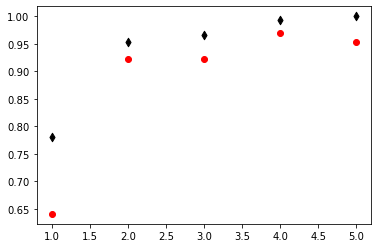

In [12]:
from sklearn import tree
best_cv = 0 
best_depth = 0
# initializes cv_scores and depth for comparison
fig, ax = plt.subplots(1)
# create a figure for visualization
for i in range(1,6):
# loop only through 5 to avoid overfitting
    T = tree.DecisionTreeClassifier(max_depth = i)
# initializes a Decision Tree Classifier model with depth i
    cv_score = cross_val_score(T, x_train, y_train, cv = 20).mean()
# get the mean of 20 K-fold cv scores on the training data
    cv_score2 = cross_val_score(T, x_test, y_test, cv = 20).mean()
# get the mean of 20 K-fold cv scores on the test data
    if cv_score2 > best_cv:
# the highest test score is set to be our best cv
        best_cv = cv_score
# the best depth is set to the corresponding iteration
        best_depth = i
   
    T.fit(x_train, y_train)
# fit the Decision Tree Classifier on the training data
    ax.scatter(i, T.score(x_train, y_train), color = "black", marker = 'd')
# scatter plot the training data
    ax.scatter(i, T.score(x_test, y_test), color = "red", marker = 'o')
# scatter plot the test data



*By above, we see that our test data does best with 4 or 5 columns as our depth. Thus, we can have the following combinations based on our findings using the RFE-model, given that 1 of the columns must be qualitative, which we choose to be the Sex:*
1. Sex, Culmen Length, Culmen Depth, Clutch Completion, Delta 15 N (o/oo)
2. Sex, Culmen Length, Culmen Depth, Clutch Completion
3. Sex, Culmen Length, Culmen Depth, Delta 15 N (o/oo)
4. Sex, Culmen Length, Clutch Completion, Delta 15 N (o/oo)
5. Sex, Culmen Depth, Clutch Completion, Delta 15 N (o/oo)


*It also follows that the score is above 95 on the test data for complexity 4, and around 93 on complexity 5. We avoid using any more columns for our testing due to the specs given in the project, and with concerns of overfitting. So, we decide to stick with 4 to not exceed 3 columns in our predictions. Therefore, the 1st
combination of 5 is eliminated from the possible combinations. Thus, we have:*

1. Sex, Culmen Length, Culmen Depth
2. Sex, Culmen Length, Delta 15 N (o/oo)
3. Sex, Culmen Depth, Delta 15 N (o/oo)

L[0] is: penguins['Species', 'Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']

L[1] is: penguins['Species', 'Sex', 'Culmen Length (mm)', 'Delta 15 N (o/oo)']

L[2] is: penguins['Species', 'Sex', 'Culmen Depth (mm)', 'Delta 15 N (o/oo)']



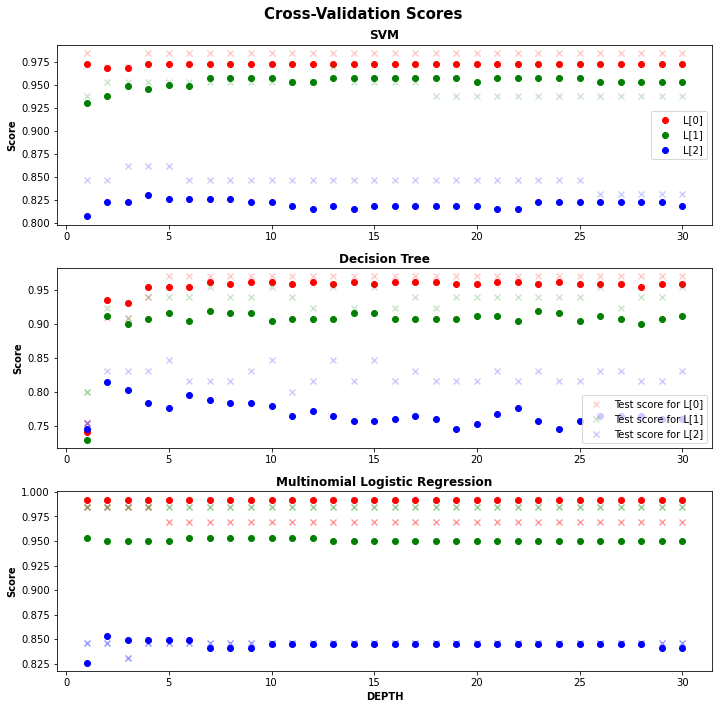

In [21]:
fig, ax = plt.subplots(3, 1, figsize = (10, 15))
# create a plot with 3 figures, each corresponding to a
# different machine learning method
L = [['Species','Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'], 
     ['Species','Sex', 'Culmen Length (mm)', 'Delta 15 N (o/oo)'],
     ['Species','Sex', 'Culmen Depth (mm)', 'Delta 15 N (o/oo)']]
# initialize a list of the combinations we have, including the 
# qualitative data Sex that we use, and the target data Species

colors = {
    str(L[0]) : 'red',
    str(L[1]) : 'green',
    str(L[2]) : 'blue'
}

# create a dict for different colors for the different combinations
# when plotting

ct = 0
# counter for axis labeling
best_C_svm = np.inf
best_i_svm = []
best_cv_svm = 0
# initializes scores needed on the Support Vector Machines model

best_depth = 0
best_cv_T = 0
best_i_T = []
# initializes scores needed on the Decision Tree Classifier
best_C_LR = np.inf
best_cv_LR = 0
best_i_LR = []
# initializes scores needed on the Multinomial Logistic Regression

best_total_score_svm = 0
best_total_score_T = 0
best_total_score_LR = 0
# initializes scores for finding the best score on each model

for i in L:
    
    p = penguins[i]
# p is the extraction of penguins by the list L index that we loop through
    train, test = train_test_split(p, test_size = 0.2)
# use train_test_split on that data from p
    
    x_train, y_train = prep_penguins(train)
    x_test, y_test = prep_penguins(test)
# use the prep function on train and test data
    
    print("L[" + str(ct)  + "]" + " is: penguins" + str(i) + "\n")
# print the data that represents L[i] for reading output easier
    for j in range(1,31):
# loop through a range of different possibilites on our selection
# of C in SVM and LR, as well as the depth in our decision tree
        SVM = svm.SVC(C = j, gamma = 'auto')
# initializes a SVM model with C = j, and gamma is automatically
# adjusted to the C score by autotuning using the 'auto' call
        SVM.fit(x_train, y_train)
# fit the SVM model on the training data
        cv_score_svm = cross_val_score(SVM, x_train, y_train, cv = 10).mean()
# get the cv score on the training data with a 10 fold, and get the mean
        if cv_score_svm > best_cv_svm:
# if the score is better than previous scores
            best_cv = cv_score_svm
# we set the best cv score to the current score
            best_C_svm = j
# set the best C choice to be at the current iteration
            best_i_svm = i
# takes the dataset of the best score obtained from L
        if j == 1:
# set the label only at the 1st loop and scatter it too
# so the data don't disappear from our plot
            ax[0].scatter(j, cv_score_svm, marker = 'o',
                       color = colors[str(L[ct])], 
                       label = "L[" + str(ct) + "]")
# scatter the cv score of training data of SVM at the jth iteration
            ax[0].scatter(j, SVM.score(x_test, y_test), marker = 'x',
                          color = colors[str(L[ct])], alpha = 0.2)
# scatter the cv score of test data of SVM at the jth iteration
        else:
            ax[0].scatter(j, cv_score_svm, marker = 'o',
                       color = colors[str(L[ct])])
# scatter the cv score of training data of SVM at the jth iteration
            ax[0].scatter(j, SVM.score(x_test, y_test), marker = 'x',
                          color = colors[str(L[ct])], alpha = 0.2)
# scatter the cv score of test data of SVM at the jth iteration
        ax[0].set_ylabel('Score', fontweight = 'bold')
# set the label of the y-axis to be our score
        ax[0].set_title("SVM", fontweight = 'bold')
# set the title to be the model we used

        a = SVM.score(x_test, y_test)
# find the score of the model on the test data
        if a > best_total_score_svm:
# if the test score is better than all previous scores we
# make that our best score
            best_total_score_svm = a
            
        T = tree.DecisionTreeClassifier(max_depth = j)
# initializes a decision tree machine learning model with depth j
        T.fit(x_train, y_train)
# fit the model on our training data
        cv_score_T = cross_val_score(T, x_train, y_train, cv = 10).mean()
# get the cv score of a 10 fold, and get the mean

        b = T.score(x_test, y_test)
# find the score on the test data 
        if b > best_total_score_T:
# if the test score is better than all previous scores we
# make this our new best total score for decision trees
            best_total_score_T = b
# if the cv score on the training data is better than all previous
# we make this the new best cv score
        if cv_score_T > best_cv_T:
# assign new best score
            best_cv_T = cv_score_T
# assign the corresponding best depth
            best_depth = j
# get the columns we used for the best score
            best_i_T = i
        
        if j == 1:
# label only at the first iteration for the scatter plot used for legends
# scatter the score on the test data
            ax[1].scatter(j, T.score(x_test, y_test), marker = 'x',
                          color = colors[str(L[ct])], alpha = 0.2,
                          label = "Test score for L[" + str(ct) + "]")
    
# scatter the cv score on the training data
        ax[1].scatter(j, cv_score_T, marker = 'o',
                       color = colors[str(L[ct])])
# scatter the test score
        ax[1].scatter(j, T.score(x_test, y_test), marker = 'x',
                          color = colors[str(L[ct])], alpha = 0.2)
# set y label to be score
        ax[1].set_ylabel('Score', fontweight = 'bold')
# set the title to be the machine learning model used      
        ax[1].set_title("Decision Tree", fontweight = 'bold')
        
        
        LR = LogisticRegression(C = j, multi_class = 'multinomial', 
                                solver = 'newton-cg')
# initialize a multinomial logistic regression model by specifying multinomial 
# as our class & take newton-cg as our solver to make the model converge
# have C be the depth of j at the jth iteration
        LR.fit(x_train, y_train)
# fit the model on our training data
        cv_score_LR = cross_val_score(LR, x_train, y_train, cv = 10).mean()
# compute the cv scores on the training data with 10 fold and take the mean
        c = LR.score(x_test, y_test)
# score the model on our test data

        if c > best_total_score_LR:
# if the score is better than all previous scores, we assign it to be
# our new best score
            best_total_score_LR = c
        
        if cv_score_LR > best_cv_LR:
# if our cv score is better than all previous scores,
# we assign it to be our new best cv score
            best_cv_LR = cv_score_LR
            best_C_LR = j
# set the C to be our new best C
            best_i_LR = i
# assign the columns used to find the best score
            
        ax[2].scatter(j, cv_score_LR, marker = 'o',
                      color = colors[str(L[ct])])
# scatter plot the cv scores on our data
        ax[2].scatter(j, LR.score(x_test, y_test), marker = 'x',
                          color = colors[str(L[ct])], alpha = 0.4)
# set y-label to be our score
        ax[2].set_ylabel('Score', fontweight = 'bold')
# set x label to be the entry to be the depth we operate on
# all models share the same x-axis
        ax[2].set_xlabel('DEPTH', fontweight = 'bold')
# set the title to be the machine learning model we used
        ax[2].set_title('Multinomial Logistic Regression', 
                        fontweight = 'bold')
# update the iteration for legends 
    ct += 1

fig.suptitle("Cross-Validation Scores", fontsize = '15', fontweight = 'bold')
# sets the overall figure title
ax[0].legend()
ax[1].legend()
# applies legends on the axis where labels are set
plt.tight_layout()


## Modeling Analysis
***Culmen Length and Culmen Depth:***
*Culmen Length and Culmen Depth best seperates the penguins from each other overall for all three models due to larger differences between the penguins than any other column combination. This is related to how close they all are in values for the Delta 15 (o/oo) scores, so that it makes it harder to seperate the penguins from each other when that column is included. We add the summary statistics below to see why that is.*
1. ***SVM:*** We see that Culmen Length and Culmen Depth gives the superior predictions on average, and it corresponds to the inspection we've done on the differences in the species corresponding to their features on those columns. By inspecting the different cv-scores for different values of C it looks like choice doesn't greatly impact the scores of the model. This may be due to the flexibility that comes from setting gamma to be automatically tuned by the C score. This offers the SVM model greater flexibility in the choice of C. The best score, however, comes from the Culmen Depth and Delta 15 (o/oo), which in total on all models is in the middle range of both cv-scores and test scores.
2. ***Decision Tree:*** It looks like there is a great correlation between the test scores and the cv scores for the decision tree. However, the greater depth into the decision tree does not seem to have too much of an impact on the scores, which is a bit surprising as we would expect overfitting to be an issue when the depth of the decision tree becomes large. This also may be because of our choice of 10 on the K fold, which means that we're not left with too much test data, and the dataset is only of 300+ points. We would expect that if the dataset was very large, we would possibly run into more issues than what is the case here. We also see less correlation for the last column of Culmen Depth and Delta !5 (o/oo). That comes from close relations across the species in these columns, which we see on the summary statistics below.
3. ***Multinomial Logistic Regression:*** For the first column, we observe that the Culmen Length and Culmen Depth gives the best cv-scores, but the test scores decrease from the cv-scores for that column. That can be an indication that it does not make the best predictions. Conversely, the column for Culmen Length and Delta 15 N (o/oo) gives lower cv-scores than the first column, but the test scores goes up such that it can make for a better predictor column for the Multinomial Logistic Regression. It can come from larger differences between the species in that combination that better fits the model construction. Also, the last column has almost equivalent test scores and cv-scores, making it the one with less variance between the two. However, it is also the column with the lowest scores. Thus, it does not seem to be the best choice for predicting our data. 

*Due to the high average results we get an overall average picture of how the model might be expected to perform on the real test set on all the different models. Thus, it seems like they are effective in predicting the data based on our choice of columns, as the best choice of columns for each model seem to average around 95% correctly.*

In [ ]:
# add summary statistics here

In [15]:
print("Best C for SVM is: " + str(best_C_svm) + 
      " and gamma is set on autotuning by built-in functions.")
print("Best dataset for SVM is: " + str(best_i_svm) + "\n")
#prints the best find of C for SVM and the best dataset

print("Best depth for Decision Tree is: " + str(best_depth))
print("Best dataset for DecisionTree is: " + str(best_i_T) + "\n")
#prints the best depth for the decision tree and the best dataset

print("Best C for Multinomial Logistic Regression is: " + str(best_C_LR))
print("Best dataset for MLR is: " + str(best_i_LR) + "\n")
#prints the best depth for MLR and the best dataset

models = ["SVM", "Decision Tree Classifier", "Multinomial Logistic Regression"]
#creates a list of the models for printing
scores = [best_total_score_svm, best_total_score_T, best_total_score_LR]
#creates a list of the corresponding best total scores
for i in range(3):
    print("The best prediction of " + models[i] + " was: " + str(scores[i]) + 
          "\n")
    

Best C for SVM is: 30 and gamma is set on autotuning by built-in functions.
Best dataset for SVM is: ['Species', 'Sex', 'Culmen Depth (mm)', 'Delta 15 N (o/oo)']

Best depth for Decision Tree is: 9
Best dataset for DecisionTree is: ['Species', 'Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']

Best C for Multinomial Logistic Regression is: 1
Best dataset for MLR is: ['Species', 'Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']

The best prediction of SVM was: 0.984375

The best prediction of Decision Tree Classifier was: 0.921875

The best prediction of Multinomial Logistic Regression was: 1.0



## Confusion Matrix

*We'll use the confusion matrix the find out where our predictive models might be mistaken. We do so by finding predictions on our target data and compare it to the actual target data, and see where we were mistaken.*

In [27]:
from sklearn.metrics import confusion_matrix

def confusion(y_t, y_p):
    """
    Takes the predictive variables x_train, target variables y_train,
    and the predicted target variables y_preds extracted from penguins 
    and shows where we fail in comparison to our predictive data
    """
    
    c = confusion_matrix(y_t, y_p)
    # gets the confusion matrix by
    # comparing y_train and y_pred
    print(c)
    print("\n")
    mistakes_labels = y_t[y_t != y_p]
    # finds all entries in y_train where
    # they are not equal
    mistakes_pred = y_p[y_t != y_p]
    # vice versa for y_pred
    m_plots = len(mistakes_labels)
    print("Mistake predictions: ")
    print(mistakes_pred)
    print("\n")
    
    print("Mistake labels: ")
    print(mistakes_labels)
    print("\n")
    

In [28]:
SVM = svm.SVC(C = best_C_svm, gamma = 'auto')
# initialize an SVM model on the best C
LR = LogisticRegression(C = best_C_LR, multi_class = 'multinomial', 
                        solver = 'newton-cg')
# initialize a MLR model on the best C
T = tree.DecisionTreeClassifier(max_depth = best_depth)
# initialize a Decision Tree model with best depth

MODELS = [SVM, LR, T]
# create a list with the models
for c in MODELS:
# fit the models on the training data
    c.fit(x_train, y_train)
# make a prediction on the target data for the model
    y_pred = c.predict(x_train)
# prints the confusion matrix for the specified model c
    print("Confusion Matrix for " + str(c) + " on the best performing dataset")
    confusion(y_train, y_pred)
# uses the confusion function to print the matrix
    print("\n")

    


Confusion Matrix for SVC(C=30, gamma='auto') on the best performing dataset
[[102  11   0]
 [ 25  26   0]
 [  0   0  95]]


Mistake predictions: 
[0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0]


Mistake labels: 
[1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1]




Confusion Matrix for LogisticRegression(C=1, multi_class='multinomial', solver='newton-cg') on the best performing dataset
[[101  10   2]
 [ 26  25   0]
 [  1   0  94]]


Mistake predictions: 
[1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 2 1 0 0 0 0 1 0 1 0 0 1 0
 1 0]


Mistake labels: 
[0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 2 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1
 0 1]




Confusion Matrix for DecisionTreeClassifier(max_depth=7) on the best performing dataset
[[110   3   0]
 [ 19  32   0]
 [  0   0  95]]


Mistake predictions: 
[0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0]


Mistake labels: 
[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1]






## Discussion on Confusion Matrix
*Before starting our discussion, it is important to note that 0 = Adelie, 1 = Chinstrap, and 2 = Gentoo*

1. ***SVC Model:*** The best column for the SVM model was with Sex, Culmen Depth and Delta 15 (o/oo). We see that it mostly confuses 0's and 1's, which corresponds to Adelie's and Chinstrap's. The reason for why, is that the culmen depth is roughly 1.5mm apart, but the standard deviation can make them overlap such that the model will guess the wrong penguins where they are most likely to intersect. The same goes for Delta 15 N (o/oo). They are only about .1 apart, and the standard deviation makes it possible for the species for the overlap such that the model can make wrong predictions due to their somewhat close relation on these 2 features. 
2. ***Logistic Regression:*** For multinomial logisitc regression the best column was with Sex, Culmen Length, and Culmen Depth. Again, we see that it wrongly guesses 2 (Gentoo) only twice whereas all the other wrong guesses are between 1's and 0's (Chinstrap's and Adelie's, respectively). If we look at the data for Culmen Length and Culmen depth for the two species, we see that they actually are seperable by 2mm, but the large standard deviation makes it possible that Adelie's and Chinstrap's have species that can overlap. Therefore, our model can make wrong predictions for the Adelies with long and deep culmens compared to other Adelies, and similarly for Chinstraps with short and narrow culmens compared to other Chinstraps.
3. ***Decision Trees:*** We again have Sex, Culmen Length, and Culmen Depth has our predictive features, and we see that all the wrong guesses are made between Chinstraps and Adelies. The nature of the wrong guesses in the model is in all likelihood based on the exact same nature as we discussed for the Multinomial Logistic Regression.

In [22]:
penguins.groupby(['Species', 'Sex']).aggregate([np.mean, np.std])

Culmen Length (mm)           Culmen Depth (mm)            \
                          mean       std              mean       std   
Species Sex                                                            
0       0            37.212676  2.003706         17.619718  0.956126   
        1            40.427941  2.341568         19.057353  1.019265   
1       0            46.573529  3.108669         17.588235  0.781128   
        1            51.069697  1.582222         19.245455  0.771804   
2       0            45.563793  2.051247         14.237931  0.540249   
        1            49.510000  2.728674         15.725000  0.745296   

            Delta 15 N (o/oo)            
                         mean       std  
Species Sex                              
0       0            8.793275  0.475914  
        1            8.928437  0.362755  
1       0            9.250962  0.322040  
        1            9.464535  0.386763  
2       0            8.193405  0.279057  
        1            8.303429  0.245151

***Data to support discussion on the confusion matrix above***

## Preparing Data 2

*In machine learning, we need all data that we work with to be numeric to be able to make predictions, as the built-in functions do not support operations on anything but numeric datatypes. Therefore, we need to encode all columns that have non-numeric features into numerical data. This can be done by encoding strings such as "male" and "female", into 0 and 1, respectively.

In [17]:
penguins = penguins[['Species','Sex', 'Culmen Length (mm)',
                     'Culmen Depth (mm)', 'Delta 15 N (o/oo)']]
penguins

,Species,Sex,Culmen Length (mm),Culmen Depth (mm),Delta 15 N (o/oo)
1,Adelie,FEMALE,39.5,17.4,8.94956
2,Adelie,FEMALE,40.3,18.0,8.36821
4,Adelie,FEMALE,36.7,19.3,8.76651
5,Adelie,MALE,39.3,20.6,8.66496
6,Adelie,FEMALE,38.9,17.8,9.18718
...,...,...,...,...,...
338,Gentoo,FEMALE,47.2,13.7,7.99184
340,Gentoo,FEMALE,46.8,14.3,8.41151
341,Gentoo,MALE,50.4,15.7,8.30166
342,Gentoo,FEMALE,45.2,14.8,8.24246


In [18]:
le = preprocessing.LabelEncoder()
# label encoder to make all data numeric for implementing
# machine learning tools that must encode strings such as
# species and sex
index = penguins[(penguins['Sex'] == ".")].index
# find the index of missing sex corresponding to "."
penguins.drop(index, inplace = True)
# drop the rows with "." as their entry for Sex
penguins['Sex'] = le.fit_transform(penguins['Sex'])
# transform Sex into numeric data (0's and 1's for male and female)
penguins['Species'] = le.fit_transform(penguins['Species'])
# transform Species into numeric data 
# (0's, 1's, and 2's for Adelie, Chinstrap, and Gentoo)
penguins

,Species,Sex,Culmen Length (mm),Culmen Depth (mm),Delta 15 N (o/oo)
1,0,0,39.5,17.4,8.94956
2,0,0,40.3,18.0,8.36821
4,0,0,36.7,19.3,8.76651
5,0,1,39.3,20.6,8.66496
6,0,0,38.9,17.8,9.18718
...,...,...,...,...,...
338,2,0,47.2,13.7,7.99184
340,2,0,46.8,14.3,8.41151
341,2,1,50.4,15.7,8.30166
342,2,0,45.2,14.8,8.24246


## Decision Regions

In [19]:
import matplotlib.patches as mpatches

def plot_regions(X, y, c):
    """
    Plots the decision region for our implemented machine learning
    method to show where we determine the guesses of our model. It
    takes the arguments X for predictive data, y for target data, and
    c for the machine learning model passed as arguments.
    """  
# create a list with different combinations that we have found
    L = [['Culmen Length (mm)', 'Culmen Depth (mm)'],
         ['Culmen Length (mm)', 'Delta 15 N (o/oo)'],
         ['Culmen Depth (mm)', 'Delta 15 N (o/oo)']]

# create a color dictionary to distinguish which species is in
# the plot
    colors = {
        0 : 'blue',
        1 : 'green',
        2 : 'red'
    }
# create a spec dictionary to add legends to show which color belongs
# to which species
    spec = {
        0 : 'Adelie',
        1 : 'Chinstrap',
        2 : 'Gentoo'
    }

# create 3 axes to plot the 3 different column combinations
    fig, ax = plt.subplots(1,3, figsize = (20,7))

# determine the title of our figure based on which sex our target data is
    if len(y) == 161:
        fig.suptitle("Sex: MALE " + str(type(c)), fontsize = '30', 
                     fontweight = 'bold')
    if len(y) == 163:
        fig.suptitle("Sex: FEMALE " + str(type(c)), fontsize = '30', 
                     fontweight = 'bold')
        
# an index to supply the axes we plot on   
    ct = 0
# create a list of the unique species
    species = np.unique(y)
   
    for combo in L:
# loop through the different column combinations   
        if len(y) == 161:
# get the male_training data for X
            X = male_train
        elif len(y) == 163:
# get the female training data for X
            X = female_train
# x0 is the first column feature in L
        x0 = X[combo[0]]
# x1 is the second column feature in L
        x1 = X[combo[1]]
           
        grid_x = np.linspace(x0.min(),x0.max(),501)
        grid_y = np.linspace(x1.min(),x1.max(),501)
        xx, yy = np.meshgrid(grid_x, grid_y)
    
    # extract model predictions, using the 
    # np.c_ attribute to join together the 
    # two parts of the grid. 
    # array.ravel() converts an multidimensional
    # array into a 1d array, and we use array.reshape()
    # to turn the resulting predictions p 
    # back into 2d
    
        XX = xx.ravel()
        YY = yy.ravel()
        XY = np.c_[XX, YY]

        c.fit(X[[combo[0],combo[1]]], y)
        p = c.predict(XY)
        p = p.reshape(xx.shape)

            # use contour plot to visualize the predictions
        ax[ct].contourf(xx, yy, p, cmap = "jet", alpha = 0.2)
            # plot the data

# loop through the different kind of species   
        for kind in species:
# make a copy of X & y for each loop 
# to not drop data for each loop
            yplot = y.copy()
            Xplot = X.copy()
# Xplot & yplot is assigned to be only of the species 
# we are iterating on
            Xplot = X[yplot['Species'] == kind]
            yplot = yplot[yplot['Species'] == kind]
# x0 is assigned to be the first column in L[i] for that species
            x0 = Xplot[combo[0]]
# x1 is assigned to be the second column in L[i] for that species
            x1 = Xplot[combo[1]]
# scatter plot x0 and x1 assigning the color and label from
# the dictionaries above
            ax[ct].scatter(x0, x1, color = colors[kind], label = spec[kind])
# add the legend for the plot
            ax[ct].legend()
       
# set the x-label to be the first column in L[i]
        ax[ct].set_xlabel(xlabel = str(combo[0]), fontsize = '20',
                          fontweight = 'bold')
# set the y-label to be the second column in L[i]
        ax[ct].set_ylabel(ylabel = str(combo[1]), fontsize = '20',
                          fontweight = 'bold')
        
        
        ct += 1
    
    plt.tight_layout()

/Users/eirikbaekkelund/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/eirikbaekkelund/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/eirikbaekkelund/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/eirikbaekkelund/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

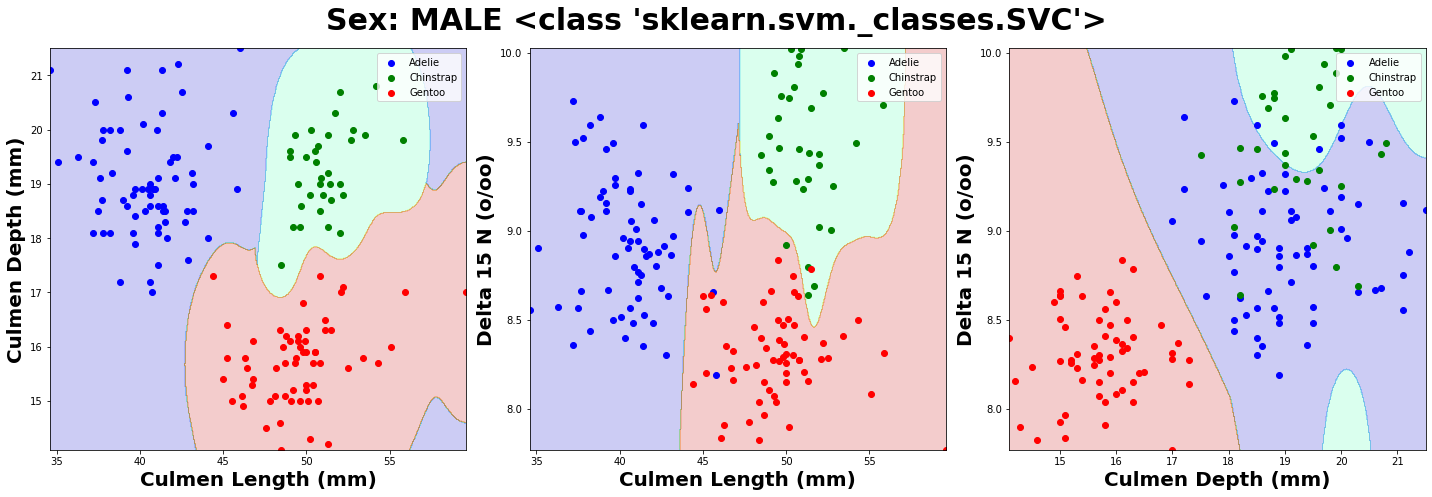

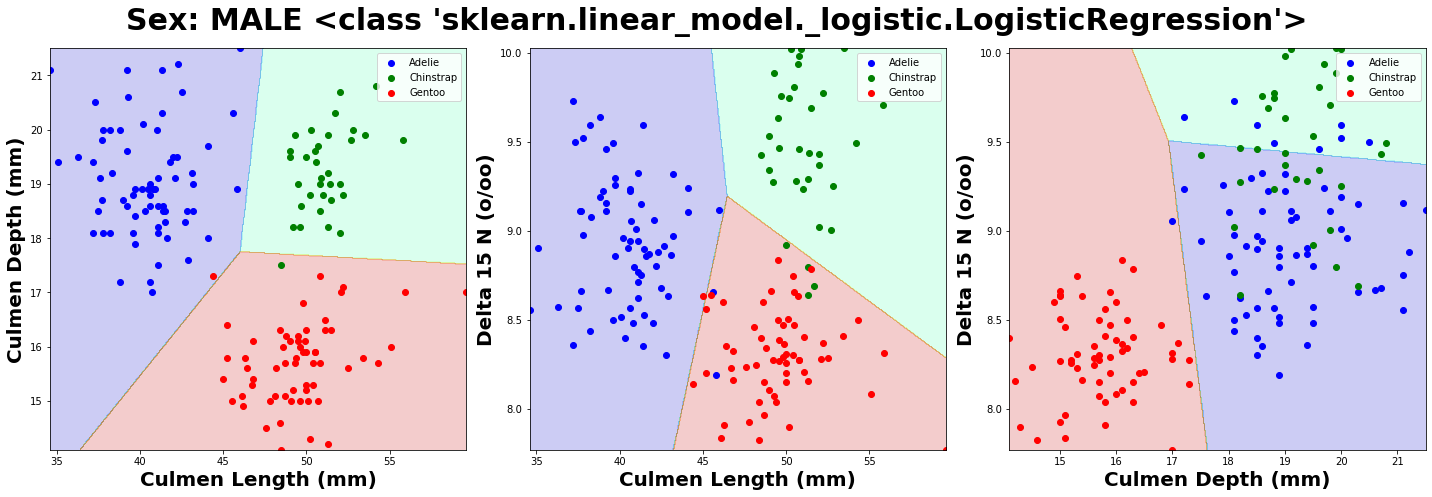

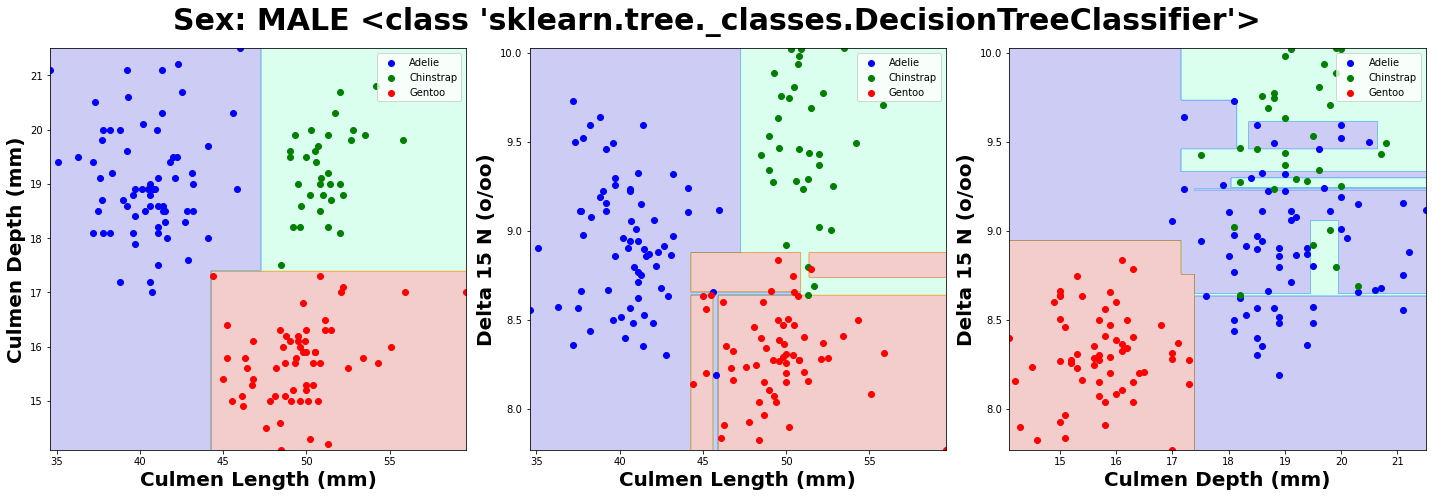

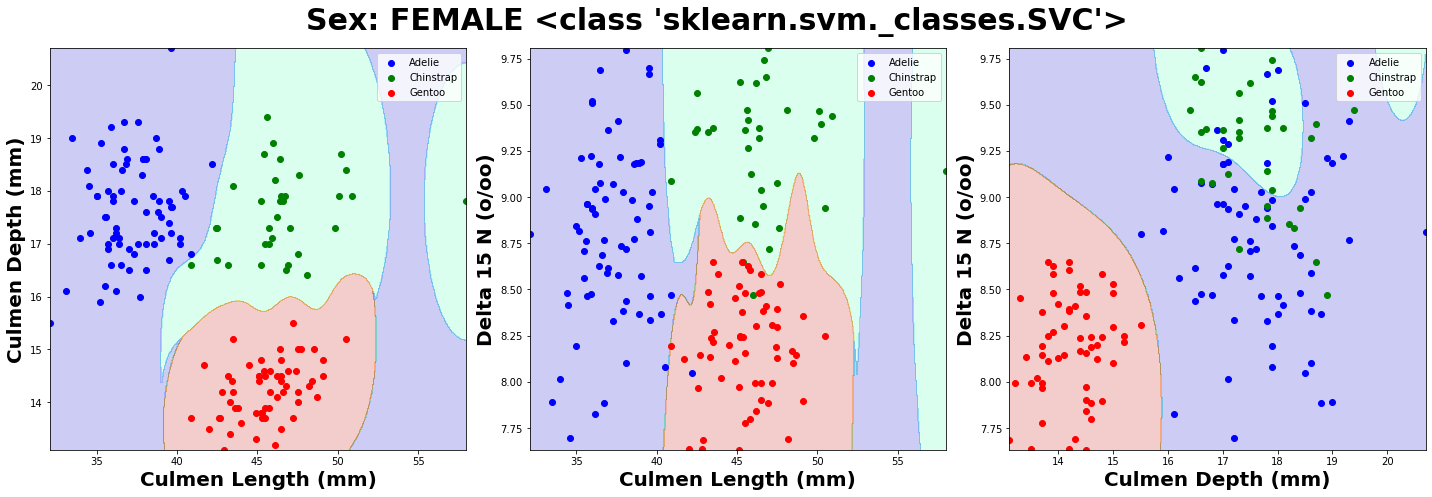

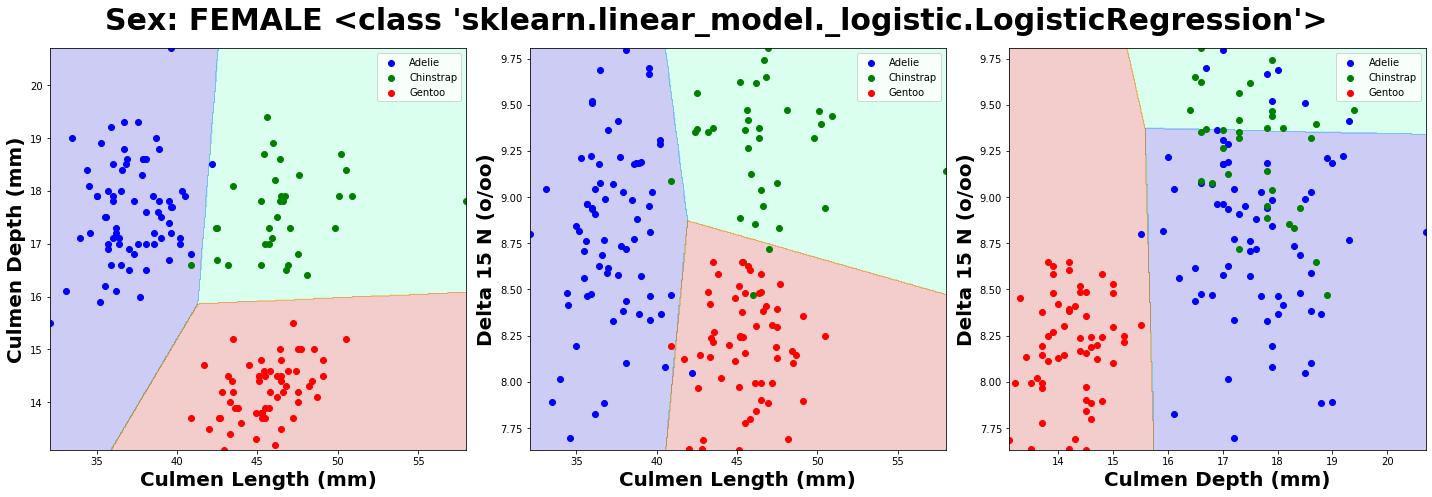

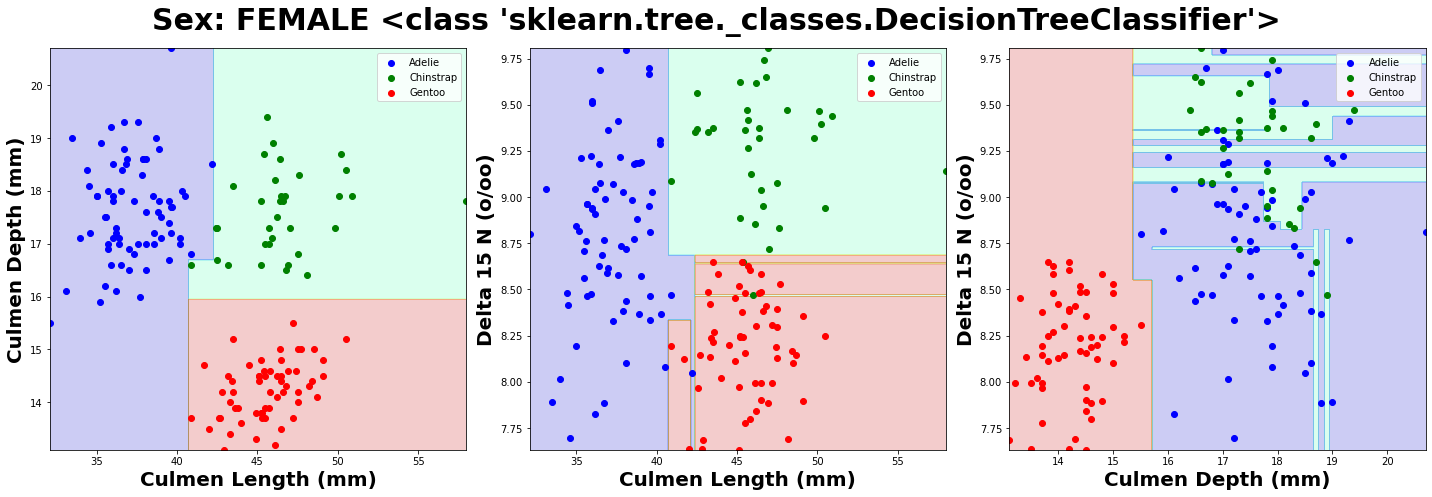

In [20]:
male_train = penguins[penguins['Sex'] == 1].drop(['Species'], axis = 1)
# initialize our male training data by dropping 
# the species column and only extract where Sex = 1 (Male = 1)
female_train = penguins[penguins['Sex'] == 0].drop(['Species'], axis = 1)
# initialize our female training data by dropping 
# the species column and only extract where Sex = 0 (Female = 0)

y_female = penguins[penguins['Sex'] == 0].drop(['Sex', 'Culmen Length (mm)', 
                                                'Culmen Depth (mm)',
                                                'Delta 15 N (o/oo)'], axis = 1)
# initialize our female target data by getting 
# the species column and only extract where Sex = 0 (Female = 0)
y_male = penguins[penguins['Sex'] == 1].drop(['Sex', 'Culmen Length (mm)', 
                                             'Culmen Depth (mm)', 
                                              'Delta 15 N (o/oo)'], axis = 1)
# initialize our male target data by getting 
# the species column and only extract where Sex = 1 (Male = 1)

# L1 is list of predictive data
L1 = [male_train, female_train]
# L2 is list of target data
L2 = [y_male, y_female]

for i in range(2):
# loop through the length of L1 and L2
    for j in MODELS:
# use the MODELS = [SVM, LR, T] to pass into plot regions
# and i to pass the male and female predictive data
# and target data
        plot_regions(L1[i], L2[i], j)


## Discussion on Decision Regions
1. ***SVM:*** For the Culmen Length and Culmen Depth Combination, it seems like the SVM model makes a good job of implementing the decision regions for our dataset. However, the red space (predicts Gentoos) for predicting Gentoos is quite large, and if the dataset was larger, it could mistakenly picked up on Adelies in the upper left part of the region, and on Chinstraps in the upper part of the region, and on the upper right side of the region. For the combination with Culmen Length and Delta 15 N (o/oo), the red region (predicts Gentoos) is very dominant and closer to intersecting in areas where no Gentoos are presents but Adelies are. The same goes for the upper right side of the graph where we would not expect Gentoos to occur, but Chinstraps are a lot closer, so there is an apparent danger in making the wrong guesses here. For the Delta 15 N (o/oo), and the Culmen Depth, the blue region (predicts Adelies) is very dominant in the area where Chinstraps and Adelies are clustered together, making it guess wrongly for several Chinstraps. There is also a random green area (predicts Chinstraps) occuring in the bottom right corner where no Chinststraps are presents, making it possible to intersect with Adelies if outlying Adelies were present in the dataset in the case for males. It's a pretty similar case for females, only that the region for predicting Adelies is overly dominant in all 3 combinations.
2. ***Multinomial Logistic Regression:*** For the Culmen Length and Culmen Depth combination, the MLR's decision region is making good distinctions between the 3 different species, such that we would expect the guesses to be fairly good even if the dataset were to increase. In the case for Culmen Length and Delta 15 N (o/oo) we see that the regions are cut out to support our data fairly well, but there is a cluster of some Adelies and Chinstraps in the Gentoo region such that a larger dataset could have issues in correctly predicting Adelies and Chinstraps as more penguins could fall into that region. For the combination of Culmen Depth and Delta 15 (o/oo), however, the Adelie region is greatly intersecting in a cluster of Chinstraps and Adelies, making it wrongly predict several Chinstraps. Therefore, this seems to not be an appropriate model for predicting species accurately, and could lead to many wrong guesses on a larger set of data. This is the case for both Male and Female predictions using the MLR model. 
3. ***Decision Trees:*** For the Culmen Length and Culmen Depth combination, the decision tree model is making quite a good decision region for correctly predicting the species, but with some issues in the centered areas where for the females, the area for Chinstraps are going into the left center, which seems to be more likely to have Adelies than Chinstraps. For the males, the Gentoo region is entering the same space, making it possible to wrongly predict Gentoos instead of adelies in the left center. For the Delta 15 (o/oo) and Culmen Length region we are running into overfitting issues in the decision region. We see that the model is creating blue regions for predicting Adelies in the red region for Gentoos, just to fit in some present Adelies. This would be dangerous in an increased dataset, as Gentoos are far more likely to be present in those areas. Similarly, the green region for predicting Chinstraps are split up by a larger red rectangle to fit in a single Gentoo. Again, that would cause issues on a larger dataset as it would be highly unlikely to see Gentoos in the majority of this region, and far more likely for Chinstraps to occur. There's also a center red rectangle that occupies an area that intersects with a region where both Adelies and Chinstraps could fall into for the male decision region. In the female case, there are also several areas where the predictive regions are trying to fit in single points that are outliers that can cause dangers in increased datasets. For the Delta 15 (o/oo) and Culmen Depth, it looks like we are again having greater issues with overfitting as we can see in the male model, small blue regions for predicting Adelies are infecting the green area where Chinstraps are a lot more likely to occur, which is an apparent danger for larger datasets. In the female model, green areas for Chinstraps and blue areas for Adelies are causing several instances of overfitting issues where they inflict areas where the other species is more present. Thus, it is not a good predicator for our species if we were operating on a new dataset or a larger one.